**Main** **Implementation**

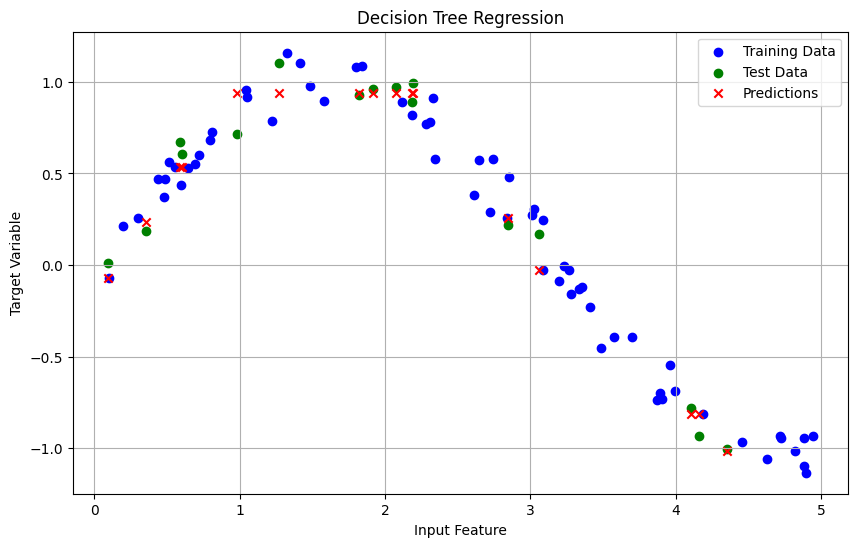

Training Score: 0.9888188985863694
Test Score: 0.9772228538593063


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # add some noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth for complexity
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred, color='red', label='Predictions', marker='x')
plt.title('Decision Tree Regression')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()

# Print the model's score
print(f'Training Score: {regressor.score(X_train, y_train)}')
print(f'Test Score: {regressor.score(X_test, y_test)}')


**Example : COVID-19 cases**



  submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
0      03/11/2021    KS     297229    241035.0     56194.0         0   
1      02/12/2021    UT     359641    359641.0         0.0      1060   
2      03/01/2021    CO     438745    411869.0     26876.0       677   
3      02/04/2020    AR          0         NaN         NaN         0   
4      08/22/2020    AR      56199         NaN         NaN       547   

   pnew_case  tot_death  conf_death  prob_death  new_death  pnew_death  \
0        0.0       4851         NaN         NaN          0         0.0   
1        0.0       1785      1729.0        56.0         11         2.0   
2       60.0       5952      5218.0       734.0          1         0.0   
3        NaN          0         NaN         NaN          0         NaN   
4        0.0        674         NaN         NaN         11         0.0   

               created_at consent_cases consent_deaths  
0  03/12/2021 03:20:13 PM         Agree            NaN  
1  02/13

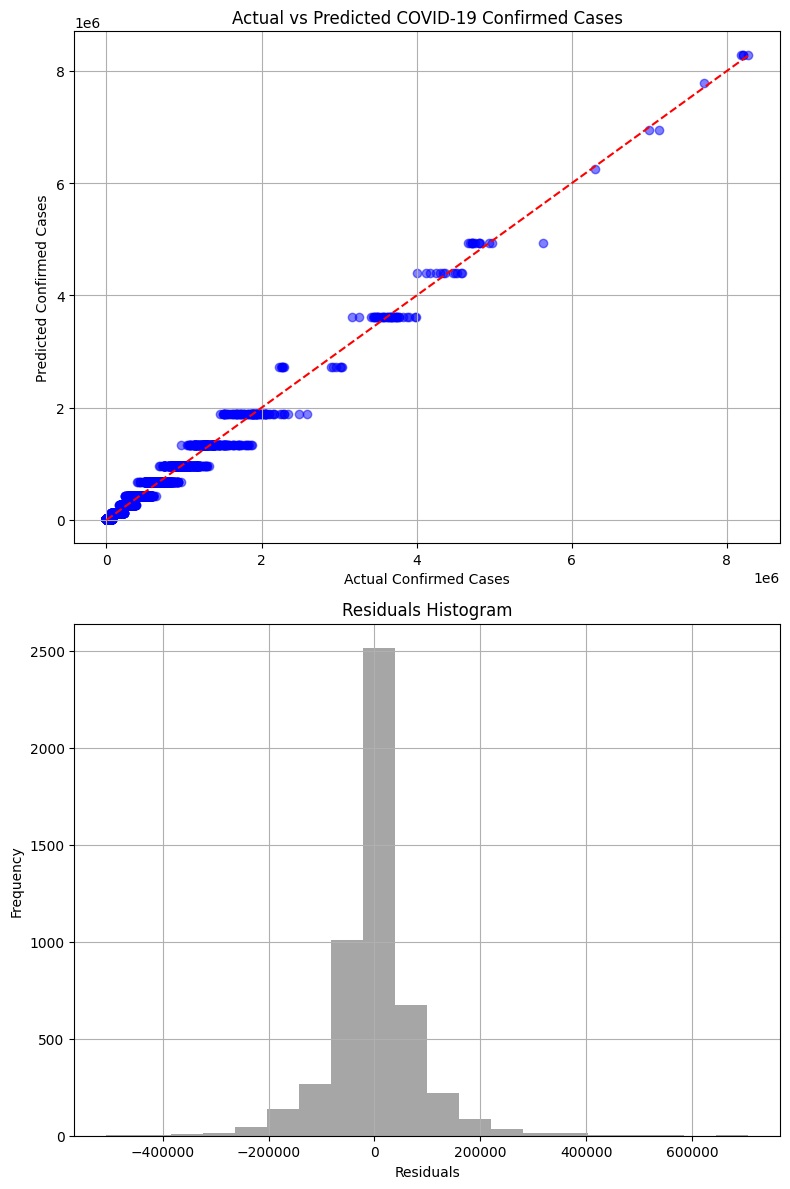

Training Score: 0.9865348881550061
Test Score: 0.9843079721407637


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('covid_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Select relevant features
X = data[['tot_cases', 'new_case', 'tot_death', 'new_death']]  # Features
y = data['conf_cases']  # Target variable

# Drop rows where any of the features or target are NaN
valid_indices = X.index.intersection(y.dropna().index)
X = X.loc[valid_indices]
y = y.loc[valid_indices]

# Check if there are still NaN values
print("NaN values in features:", X.isna().sum().sum())
print("NaN values in target:", y.isna().sum())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=4)  # Adjust max_depth as needed
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Visualizing actual vs predicted values
plt.figure(figsize=(8, 12))  # Adjusted figure size for vertical layout

# Scatter plot of actual vs predicted
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted COVID-19 Confirmed Cases')
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.grid()

# Residual plot
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='gray', alpha=0.7)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

# Print the model's score
print(f'Training Score: {regressor.score(X_train, y_train)}')
print(f'Test Score: {regressor.score(X_test, y_test)}')
